In [4]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.0 MB/s eta 0:00:00


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 72.5 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

wmt16_dataset = load_dataset('wmt16', 'de-en')

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
train_data = wmt16_dataset['train']
valid_data = wmt16_dataset['validation']
test_data = wmt16_dataset['test']

In [ ]:
example = train_data[0]
print(example)

{'translation': {'de': 'Wiederaufnahme der Sitzungsperiode', 'en': 'Resumption of the session'}}


In [ ]:
# !pip install -U spacy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !python -m spacy download de_core_news_sm

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-29 10:07:59.145018: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-29 10:07:59.145129: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-29 10:07:59.145164: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import datasets

# # Load the dataset
# dataset = datasets.load_dataset('wmt16', 'de-en')

# # Access the training, validation, and test sets
# train_data = dataset['train']
# valid_data = dataset['validation']
# test_data = dataset['test']


# # Define the model architecture
# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(LSTMModel, self).__init__()
#         self.hidden_size = hidden_size
#         self.lstm = nn.LSTM(input_size, hidden_size)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.softmax = nn.LogSoftmax(dim=1)

#     def forward(self, input):
#         output, hidden = self.lstm(input.view(1, 1, -1))
#         output = self.fc(output.view(1, -1))
#         output = self.softmax(output)
#         return output

from collections import Counter

# Load the dataset
dataset = datasets.load_dataset('wmt16', 'de-en')

# Get the train data
train_data = dataset['train']

# Preprocess the dataset and create the vocabulary
de_vocab_counter = Counter()
en_vocab_counter = Counter()

for example in train_data:
    de_tokens = example['translation']['de'].split()
    en_tokens = example['translation']['en'].split()
    de_vocab_counter.update(de_tokens)
    en_vocab_counter.update(en_tokens)

# Create the vocabulary dictionaries
de_vocab = {token: i+2 for i, (token, count) in enumerate(de_vocab_counter.most_common())}
de_vocab['<PAD>'] = 0
de_vocab['<UNK>'] = 1
en_vocab = {token: i+2 for i, (token, count) in enumerate(en_vocab_counter.most_common())}
en_vocab['<PAD>'] = 0
en_vocab['<UNK>'] = 1

# Set the hyperparameters
input_size = len(de_vocab)
hidden_size = 256
output_size = len(en_vocab)




Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split:   0%|          | 0/4548885 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2169 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2999 [00:00<?, ? examples/s]

Dataset wmt16 downloaded and prepared to /root/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 88.9 MB/s eta 0:00:00


Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split:   0%|          | 0/4548885 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2169 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2999 [00:00<?, ? examples/s]

Dataset wmt16 downloaded and prepared to /root/.cache/huggingface/datasets/wmt16/de-en/1.0.0/746749a11d25c02058042da7502d973ff410e73457f3d305fc1177dc0e8c4227. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

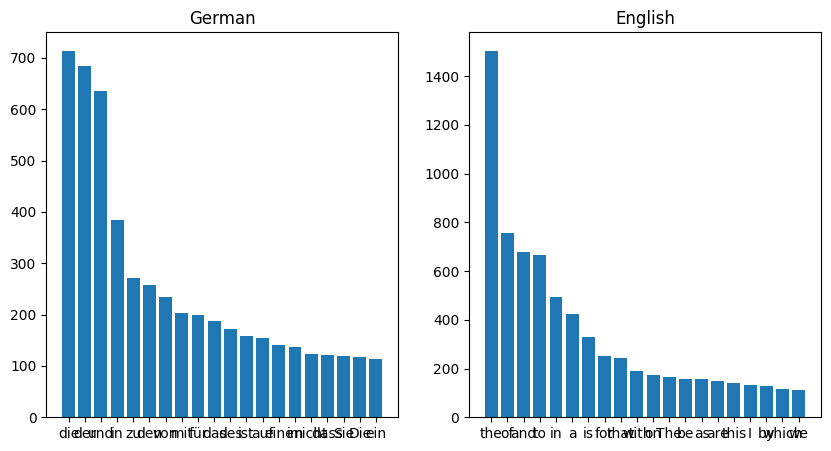

In [5]:
import random
from collections import Counter
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from transformers import AutoTokenizer
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split
import torch
import numpy as np
import random
import torch.nn as nn
import torch.optim as optim
from datasets import load_dataset

import random

# Load the WMT16 German-English dataset
dataset = load_dataset('wmt16', 'de-en')

# Get a random subset of 10,000 sentences from the training dataset
train_subset = random.sample(list(dataset['train']), k=1000)

# Get the frequency distribution of words for German and English
de_words = [word for sentence in train_subset for word in sentence['translation']['de'].split()]
en_words = [word for sentence in train_subset for word in sentence['translation']['en'].split()]
de_word_freq = Counter(de_words)
en_word_freq = Counter(en_words)

# Plot the most common words for each language
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].bar(*zip(*de_word_freq.most_common(20)))
axes[0].set_title('German')
axes[1].bar(*zip(*en_word_freq.most_common(20)))
axes[1].set_title('English')
plt.show()



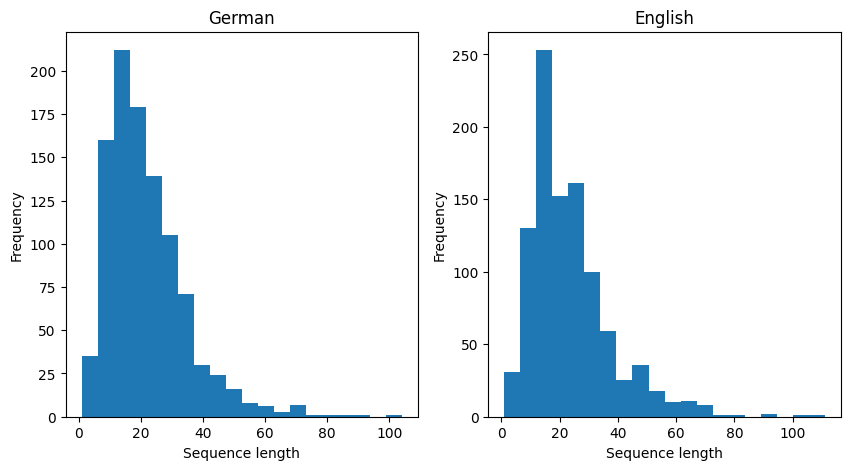

In [6]:
import matplotlib.pyplot as plt
import random
from collections import Counter

# # Load the WMT16 German-English dataset
# dataset = load_dataset('wmt16', 'de-en')

# # Get a random subset of 10,000 sentences from the training dataset
# train_subset = random.sample(list(dataset['train']), k=1000)

# Get the sequence lengths for each sentence
de_seq_lengths = [len(sentence['translation']['de'].split()) for sentence in train_subset]
en_seq_lengths = [len(sentence['translation']['en'].split()) for sentence in train_subset]

# Plot the sequence lengths for each language
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(de_seq_lengths, bins=20)
axes[0].set_title('German')
axes[0].set_xlabel('Sequence length')
axes[0].set_ylabel('Frequency')
axes[1].hist(en_seq_lengths, bins=20)
axes[1].set_title('English')
axes[1].set_xlabel('Sequence length')
axes[1].set_ylabel('Frequency')
plt.show()


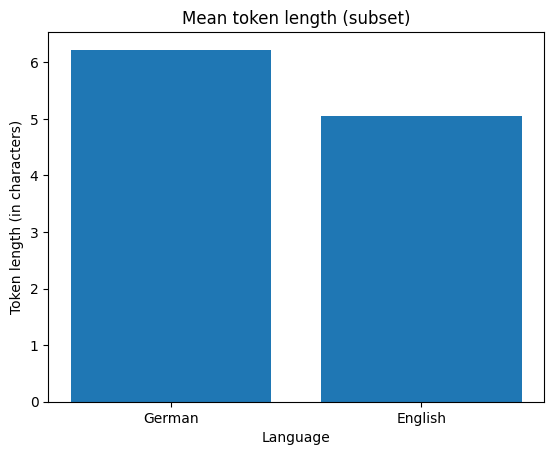

In [7]:
import random
from collections import Counter
import matplotlib.pyplot as plt
from datasets import load_dataset

# # Load the WMT16 German-English dataset
# dataset = load_dataset('wmt16', 'de-en')

# # Get a random subset of 1000 sentences from the training dataset
# train_subset = random.sample(list(dataset['train']), k=1000)

# Get all the German and English tokens from the subset
de_tokens_subset = [token for x in train_subset for token in x['translation']['de'].split()]
en_tokens_subset = [token for x in train_subset for token in x['translation']['en'].split()]

# Get the length of each token in the subset
de_token_lengths_subset = [len(token) for token in de_tokens_subset]
en_token_lengths_subset = [len(token) for token in en_tokens_subset]

# Calculate the mean token length for the subset
de_mean_token_length_subset = sum(de_token_lengths_subset) / len(de_token_lengths_subset)
en_mean_token_length_subset = sum(en_token_lengths_subset) / len(en_token_lengths_subset)

# Plot the mean token lengths for the subset
plt.bar(['German', 'English'], [de_mean_token_length_subset, en_mean_token_length_subset])
plt.title('Mean token length (subset)')
plt.xlabel('Language')
plt.ylabel('Token length (in characters)')
plt.show()


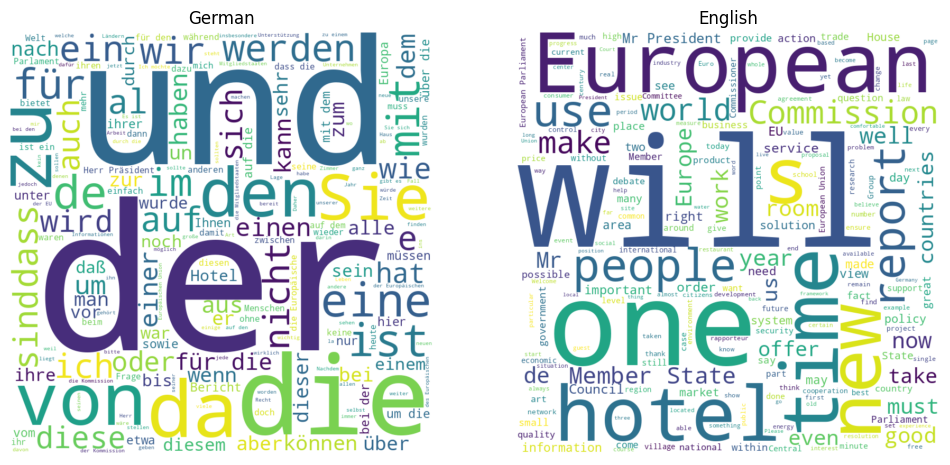

In [8]:
from wordcloud import WordCloud

# Generate the word clouds
de_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(de_words))
en_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(en_words))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
axes[0].imshow(de_wordcloud, interpolation='bilinear')
axes[0].set_title('German')
axes[0].axis('off')
axes[1].imshow(en_wordcloud, interpolation='bilinear')
axes[1].set_title('English')
axes[1].axis('off')
plt.show()

In [16]:
nltk.download('comparable_corpora')

[nltk_data] Error loading comparable_corpora: Package
[nltk_data]     'comparable_corpora' not found in index


False

In [20]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
import nltk

# # Load the WMT16 German-English dataset
# dataset = load_dataset('wmt16', 'de-en')

# # Get a random subset of 10,000 sentences from the training dataset
# train_subset = random.sample(list(dataset['train']), k=1000)

# Tokenize the German and English sentences
de_sentences = [sentence['translation']['de'] for sentence in train_subset]
en_sentences = [sentence['translation']['en'] for sentence in train_subset]
de_tokens = [nltk.word_tokenize(sentence) for sentence in de_sentences]
en_tokens = [nltk.word_tokenize(sentence) for sentence in en_sentences]

# Perform POS tagging for German and English
de_pos = [nltk.pos_tag(tokens) for tokens in de_tokens]
en_pos = [nltk.pos_tag(tokens) for tokens in en_tokens]

# Print the POS tagging for the first sentence in German and English
print('German:', de_pos[0])
print('English:', en_pos[0])

German: [('Sie', 'NNP'), ('hat', 'WP'), ('ihre', 'VBP'), ('oberste', 'NN'), ('Priorität', 'NNP'), ('mit', 'NN'), ('anerkennenswertem', 'NN'), ('Geschick', 'NNP'), ('erreicht', 'NN'), (':', ':'), ('Europa', 'NNP'), ('einen', 'VBZ'), ('neuen', 'JJ'), ('Vertrag', 'NNP'), ('zu', 'NN'), ('geben', 'NN'), ('.', '.')]
English: [('It', 'PRP'), ('achieved', 'VBD'), ('its', 'PRP$'), ('top', 'JJ'), ('priority', 'NN'), ('with', 'IN'), ('acknowledged', 'JJ'), ('skill', 'NN'), (':', ':'), ('to', 'TO'), ('give', 'VB'), ('Europe', 'NNP'), ('a', 'DT'), ('new', 'JJ'), ('Treaty', 'NNP'), (',', ','), ('which', 'WDT'), ('was', 'VBD'), ('a', 'DT'), ('great', 'JJ'), ('victory', 'NN'), ('.', '.')]


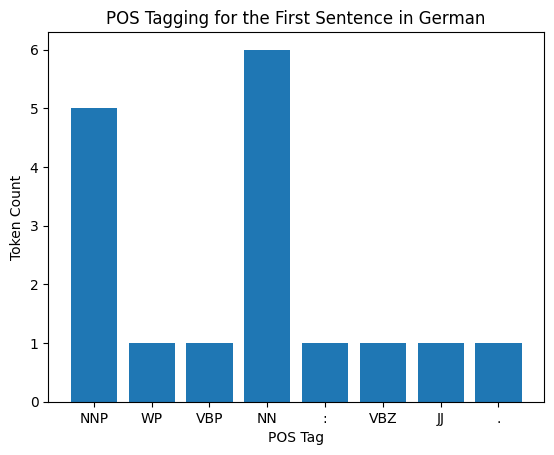

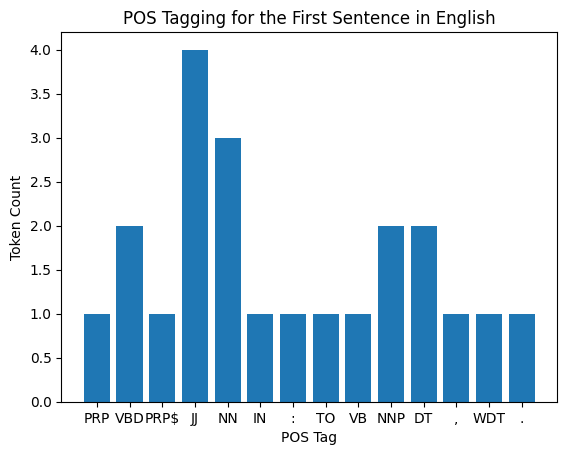

In [27]:
from collections import Counter
import matplotlib.pyplot as plt

# POS tagging for the first sentence in German
de_sentence = de_pos[0]
de_tags = [tag for _, tag in de_sentence]
de_tag_counts = Counter(de_tags)

# Plot the POS tagging for German
plt.bar(de_tag_counts.keys(), de_tag_counts.values())
plt.title('POS Tagging for the First Sentence in German')
plt.xlabel('POS Tag')
plt.ylabel('Token Count')
plt.show()

# POS tagging for the first sentence in English
en_sentence = en_pos[0]
en_tags = [tag for _, tag in en_sentence]
en_tag_counts = Counter(en_tags)

# Plot the POS tagging for English
plt.bar(en_tag_counts.keys(), en_tag_counts.values())
plt.title('POS Tagging for the First Sentence in English')
plt.xlabel('POS Tag')
plt.ylabel('Token Count')
plt.show()


<Axes: >

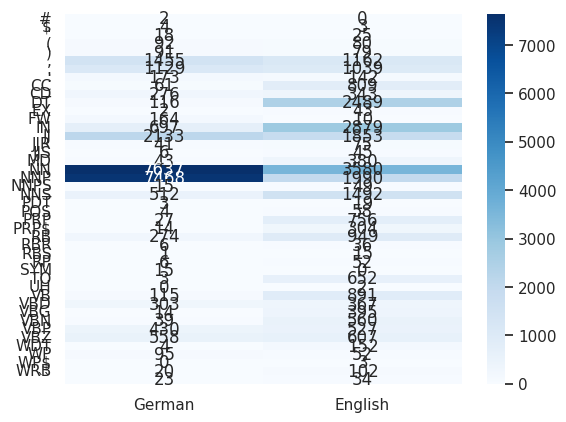

In [28]:
import nltk
import random
import seaborn as sns
from collections import Counter
from datasets import load_dataset

# # Load the WMT16 German-English dataset
# dataset = load_dataset('wmt16', 'de-en')

# # Get a random subset of 1000 sentences from the training dataset
# train_subset = random.sample(list(dataset['train']), k=1000)

# Tokenize the German and English sentences
de_sentences = [sentence['translation']['de'] for sentence in train_subset]
en_sentences = [sentence['translation']['en'] for sentence in train_subset]
de_tokens = [nltk.word_tokenize(sentence) for sentence in de_sentences]
en_tokens = [nltk.word_tokenize(sentence) for sentence in en_sentences]

# Perform POS tagging for German and English
de_pos = [nltk.pos_tag(tokens) for tokens in de_tokens]
en_pos = [nltk.pos_tag(tokens) for tokens in en_tokens]

# Count the frequency of each POS tag for German and English
de_pos_counts = Counter(tag for sentence in de_pos for _, tag in sentence)
en_pos_counts = Counter(tag for sentence in en_pos for _, tag in sentence)

# Convert the POS tag frequencies to a matrix
matrix = []
for pos_tag in sorted(set(de_pos_counts.keys()) | set(en_pos_counts.keys())):
    matrix.append([de_pos_counts[pos_tag], en_pos_counts[pos_tag]])

# Plot the heatmap
sns.set()
sns.heatmap(matrix, cmap='Blues', annot=True, fmt='d', xticklabels=['German', 'English'], yticklabels=sorted(set(de_pos_counts.keys()) | set(en_pos_counts.keys())))


In [32]:
pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 43.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9308 sha256=076c3c89dde92e3d121323e5302ff444d1efd0b6e8dee73d173d0e52f503950c
  Stored in directory: /root/.cache/pip/wheels/65/3c/c7/44672c5062c16d05760b1eaddbf611d2f6a4b715c6d6777418
Successfully built flashtext


In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

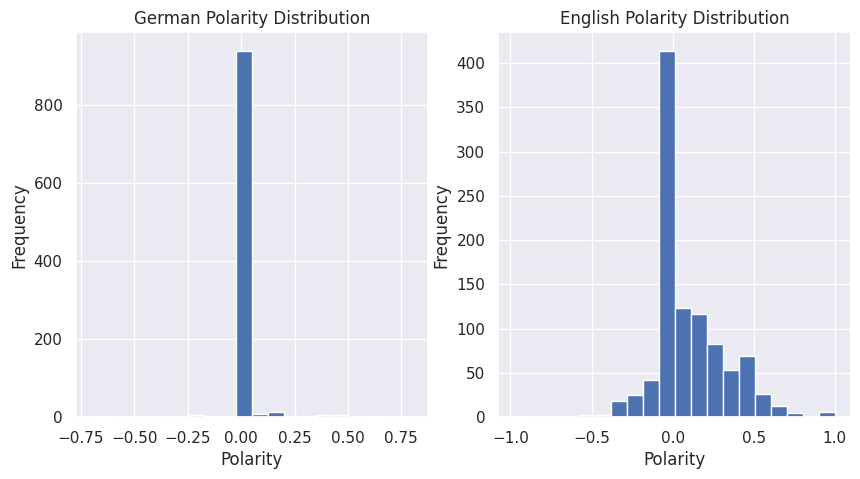

In [36]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Calculate polarity for German sentences
de_polarity = [TextBlob(sentence).sentiment.polarity for sentence in de_sentences]

# Calculate polarity for English sentences
en_polarity = [TextBlob(sentence).sentiment.polarity for sentence in en_sentences]

# Plot the polarity distributions for German and English
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(de_polarity, bins=20)
axs[0].set_title('German Polarity Distribution')
axs[0].set_xlabel('Polarity')
axs[0].set_ylabel('Frequency')
axs[1].hist(en_polarity, bins=20)
axs[1].set_title('English Polarity Distribution')
axs[1].set_xlabel('Polarity')
axs[1].set_ylabel('Frequency')
plt.show()


<ipython-input-37-76e34e032452>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([x[0] for x in de_top_unigrams], rotation=90)
<ipython-input-37-76e34e032452>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([x[0] for x in en_top_unigrams], rotation=90)


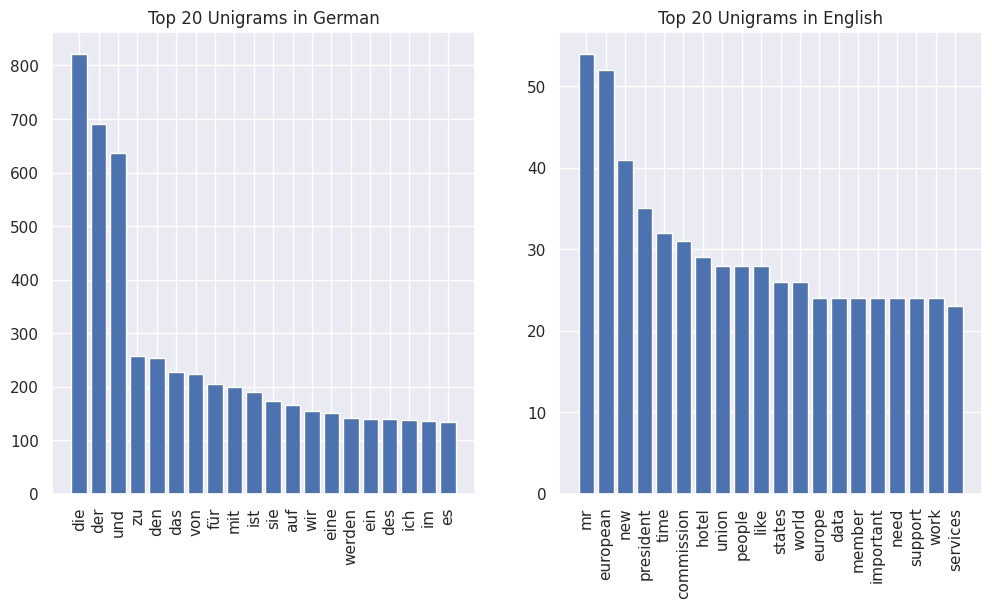

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Tokenize the German and English sentences
de_sentences = [sentence['translation']['de'] for sentence in train_subset]
en_sentences = [sentence['translation']['en'] for sentence in train_subset]
de_tokens = [' '.join(nltk.word_tokenize(sentence)) for sentence in de_sentences]
en_tokens = [' '.join(nltk.word_tokenize(sentence)) for sentence in en_sentences]

# Count the frequency of each unigram
cv_de = CountVectorizer(stop_words='english', ngram_range=(1,1))
cv_en = CountVectorizer(stop_words='english', ngram_range=(1,1))
de_unigrams = cv_de.fit_transform(de_tokens).sum(axis=0)
en_unigrams = cv_en.fit_transform(en_tokens).sum(axis=0)

# Get the top 20 unigrams and their frequencies for German and English
de_top_unigrams = [(word, de_unigrams[0, i]) for word, i in cv_de.vocabulary_.items()]
de_top_unigrams = sorted(de_top_unigrams, key=lambda x: x[1], reverse=True)[:20]
en_top_unigrams = [(word, en_unigrams[0, i]) for word, i in cv_en.vocabulary_.items()]
en_top_unigrams = sorted(en_top_unigrams, key=lambda x: x[1], reverse=True)[:20]

# Plot the distribution of top unigrams for German and English
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax[0].bar([x[0] for x in de_top_unigrams], [x[1] for x in de_top_unigrams])
ax[0].set_title('Top 20 Unigrams in German')
ax[0].set_xticklabels([x[0] for x in de_top_unigrams], rotation=90)
ax[1].bar([x[0] for x in en_top_unigrams], [x[1] for x in en_top_unigrams])
ax[1].set_title('Top 20 Unigrams in English')
ax[1].set_xticklabels([x[0] for x in en_top_unigrams], rotation=90)
plt.show()


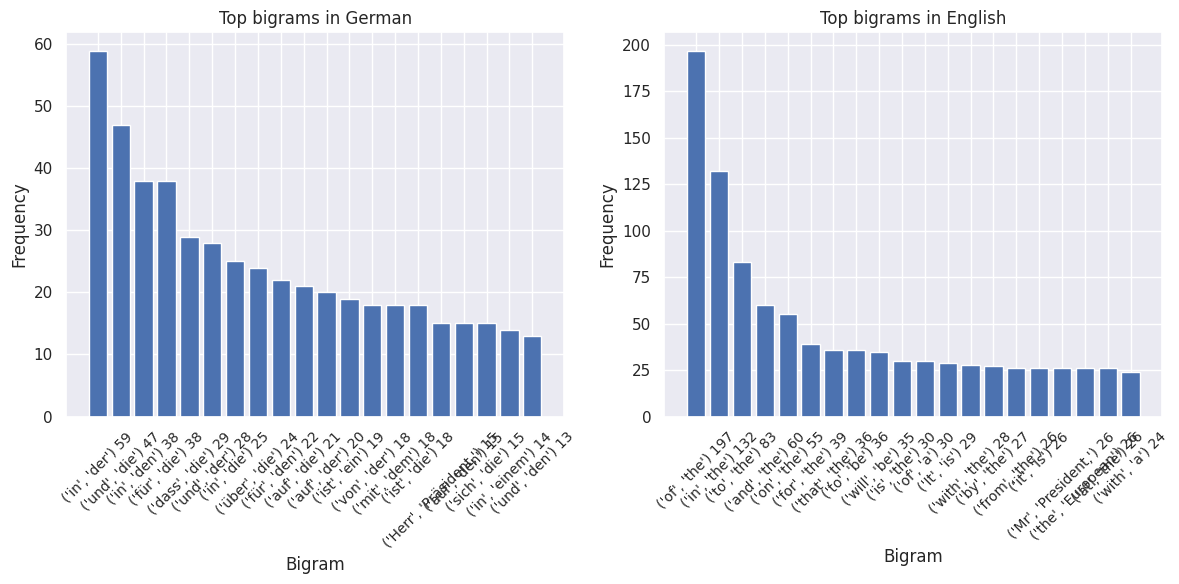

In [39]:
# Load the necessary packages
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import matplotlib.pyplot as plt

# # Load the WMT16 German-English dataset
# dataset = load_dataset('wmt16', 'de-en')

# # Get a random subset of 10,000 sentences from the training dataset
# train_subset = random.sample(list(dataset['train']), k=1000)

# Tokenize the German and English sentences
de_sentences = [sentence['translation']['de'] for sentence in train_subset]
en_sentences = [sentence['translation']['en'] for sentence in train_subset]
de_tokens = [nltk.word_tokenize(sentence) for sentence in de_sentences]
en_tokens = [nltk.word_tokenize(sentence) for sentence in en_sentences]

# Create the bigram collocation finder and get the top bigrams for German and English
bigram_measures = BigramAssocMeasures()
de_finder = BigramCollocationFinder.from_documents(de_tokens)
en_finder = BigramCollocationFinder.from_documents(en_tokens)
de_top_bigrams = de_finder.nbest(bigram_measures.raw_freq, 10)
en_top_bigrams = en_finder.nbest(bigram_measures.raw_freq, 10)

# Get the frequency distribution of bigrams for German and English
de_bigrams = [bigram for sentence in train_subset for bigram in nltk.bigrams(sentence['translation']['de'].split())]
en_bigrams = [bigram for sentence in train_subset for bigram in nltk.bigrams(sentence['translation']['en'].split())]
de_freq_dist = nltk.FreqDist(de_bigrams)
en_freq_dist = nltk.FreqDist(en_bigrams)

# Get the top 20 bigrams for German and English
de_top_bigrams = de_freq_dist.most_common(20)
en_top_bigrams = en_freq_dist.most_common(20)

# Plot the distribution of top bigrams for German and English
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('Top bigrams in German')
axs[0].bar([f'{bigram[0]} {bigram[1]}' for bigram in de_top_bigrams], [freq for _, freq in de_top_bigrams])
axs[0].tick_params(axis='x', labelrotation=45, labelsize=10)
axs[0].set_xlabel('Bigram')
axs[0].set_ylabel('Frequency')
axs[1].set_title('Top bigrams in English')
axs[1].bar([f'{bigram[0]} {bigram[1]}' for bigram in en_top_bigrams], [freq for _, freq in en_top_bigrams])
axs[1].tick_params(axis='x', labelrotation=45, labelsize=10)
axs[1].set_xlabel('Bigram')
axs[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

